In [1]:
from PIL import Image
# import imutils
import numpy as np
import os # used for navigating to image path
import imageio # used for writing images
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# from helpers import *
from itertools import product

In [2]:
LABELED_IMAGES_DIR = '../../data/tidy/labeled-images'
CONFLICT_SPLIT_DIR = '../../data/tidy/labeled-split-images'

In [3]:
if not os.path.exists(CONFLICT_SPLIT_DIR): # check if 'tidy/preprocessed_images' subdirectory does not exist
        os.makedirs(CONFLICT_SPLIT_DIR)

In [58]:
def tile(filename, dir_in, dir_out, d=9):
    tiles = []
#     tiles = {}
    name, ext = os.path.splitext(filename)
    img = Image.open(os.path.join(dir_in, filename))
    rotate_img= img.transpose(Image.ROTATE_270)
    rotate_img.show() 
    w, h = rotate_img.size
    print (rotate_img.size)
    grid = product(range(0, h, int(h/d)), range(0, w, int(w/d)))
    for i, j in grid:
#         print(i,j)
        box = (j, i, j+int(w/d), i+int(h/d))
        out = os.path.join(dir_out, f'{name}_{i}_{j}{ext}')
        t = rotate_img.crop(box)
        t.save(out)
#         tiles[str(out)] = t
        tiles.append(t)
    return tiles, filename

In [59]:
t = tile('improbable-2.jpg', LABELED_IMAGES_DIR, CONFLICT_SPLIT_DIR)

(3024, 4032)


In [62]:
def plotTilesGrid(tiles):
    plt.figure(figsize=(9,9)) # specifying the overall grid size
        
    for i in range(81):
        plt.subplot(9,9,i+1)    # the number of images in the grid is 9*9 (81)
        plt.imshow(tiles[0][i])
        plt.axis('off')
    
#     plt.subplots_adjust(left=0.125,
#                     bottom=0.5, 
#                     right=0.4, 
#                     top=0.9, 
#                     wspace=0.1, 
#                     hspace=0.25)
#     plt.subplots_adjust(hspace=0.25, wspace=0.05)
    plt.tight_layout()
    plt.savefig(CONFLICT_SPLIT_DIR+"/split_grid_"+str(tiles[1])+".png")
#     plt.show()

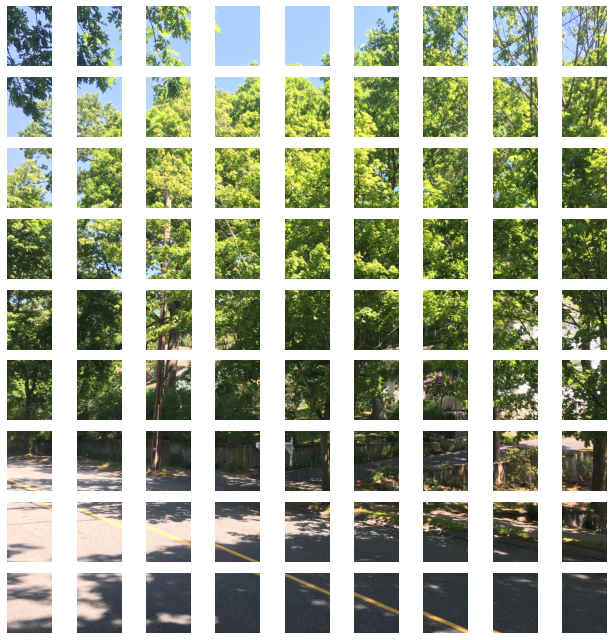

In [63]:
plotTilesGrid(t)